In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%load_ext rpy2.ipython

In [ ]:
#!pip install rpy2==3.5.1

In [ ]:
%%R
lib_loc <- "/content/drive/MyDrive/Datos/r-lib"

In [ ]:
%%R
#Carga datos de un fichero
dfMedidas <- read.csv("/content/drive/MyDrive/AnalisisDatos/Datos/Sea_Ice_Index_Monthly_Data_by_Year.csv")

In [ ]:
#eliminamos la columna de los años, definiremos los años en la serie temporal
%%R
dfMedidas <- dfMedidas[,!names(dfMedidas) %in% c("Years","Annual")]

In [ ]:
%%R 
sum(is.na(dfMedidas))
dfMedidas

   January February  March  April    May   June   July August September October
1       NA       NA     NA     NA     NA     NA     NA     NA        NA      NA
2   15.414   16.175 16.342 15.447 13.857 12.530 10.311  8.041     7.051   8.748
3   14.862   15.955 16.041 15.429 13.793 12.205 10.100  7.984     7.667   9.183
4   14.910   15.604 15.632 15.010 13.802 12.430 10.271  7.844     7.138   8.856
5   15.177   15.974 16.044 15.466 13.973 12.476 10.367  8.139     7.302   9.421
6   14.942   16.006 16.085 15.172 13.491 12.296 10.570  8.186     7.395   9.334
7   14.473   15.299 15.584 15.015 13.577 12.152  9.977  7.771     6.805   8.561
8   14.725   15.466 15.886 15.357 14.073 12.219  9.744  7.402     6.698   8.546
9   14.890   15.785 15.910 15.059 13.379 11.976 10.146  7.979     7.411   9.484
10  14.970   16.050 15.816 15.211 13.743 12.486 10.333  7.628     7.279   9.049
11      NA   15.583 15.957 15.123 13.561 11.943  9.809  7.892     7.369   9.135
12  14.955   15.495 15.423 14.328 13.044

In [ ]:
%%R #Vamos a sustituir los valores NA por la media de la columna para cada Mes

dfMedidas$January[is.na(dfMedidas$January)] <- mean(dfMedidas$January, na.rm = TRUE)
dfMedidas$February[is.na(dfMedidas$February)] <- mean(dfMedidas$February, na.rm = TRUE)
dfMedidas$March[is.na(dfMedidas$March)] <- mean(dfMedidas$March, na.rm = TRUE)
dfMedidas$April[is.na(dfMedidas$April)] <- mean(dfMedidas$April, na.rm = TRUE)
dfMedidas$May[is.na(dfMedidas$May)] <- mean(dfMedidas$May, na.rm = TRUE)
dfMedidas$June[is.na(dfMedidas$June)] <- mean(dfMedidas$June, na.rm = TRUE)
dfMedidas$July[is.na(dfMedidas$July)] <- mean(dfMedidas$July, na.rm = TRUE)
dfMedidas$August[is.na(dfMedidas$August)] <- mean(dfMedidas$August, na.rm = TRUE)
dfMedidas$September[is.na(dfMedidas$September)] <- mean(dfMedidas$September, na.rm = TRUE)
dfMedidas$October[is.na(dfMedidas$October)] <- mean(dfMedidas$October, na.rm = TRUE)
dfMedidas$November[is.na(dfMedidas$November)] <- mean(dfMedidas$November, na.rm = TRUE)
dfMedidas$December[is.na(dfMedidas$December)] <- mean(dfMedidas$December, na.rm = TRUE)

In [ ]:
%%R
class(dfMedidas)

[1] "data.frame"


In [ ]:
%%R
tss <- as.vector(t(dfMedidas))
Df_ts <- ts(tss, start = c(1978, 1),end=c(2022,12) ,frequency = 12)
Df_ts

           Jan       Feb       Mar       Apr       May       Jun       Jul
1978 14.207721 15.089727 15.242114 14.512886 13.112795 11.525159  9.077682
1979 15.414000 16.175000 16.342000 15.447000 13.857000 12.530000 10.311000
1980 14.862000 15.955000 16.041000 15.429000 13.793000 12.205000 10.100000
1981 14.910000 15.604000 15.632000 15.010000 13.802000 12.430000 10.271000
1982 15.177000 15.974000 16.044000 15.466000 13.973000 12.476000 10.367000
1983 14.942000 16.006000 16.085000 15.172000 13.491000 12.296000 10.570000
1984 14.473000 15.299000 15.584000 15.015000 13.577000 12.152000  9.977000
1985 14.725000 15.466000 15.886000 15.357000 14.073000 12.219000  9.744000
1986 14.890000 15.785000 15.910000 15.059000 13.379000 11.976000 10.146000
1987 14.970000 16.050000 15.816000 15.211000 13.743000 12.486000 10.333000
1988 14.207721 15.583000 15.957000 15.123000 13.561000 11.943000  9.809000
1989 14.955000 15.495000 15.423000 14.328000 13.044000 12.245000 10.130000
1990 14.783000 15.578000 

In [ ]:
%%R
class(Df_ts)

[1] "ts"


In [ ]:
%%R
print(start(Df_ts))
print(end(Df_ts))


[1] 1978    1
[1] 2022   12


In [ ]:
%%R
print(frequency(Df_ts))
print(cycle(Df_ts))


[1] 12
     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1978   1   2   3   4   5   6   7   8   9  10  11  12
1979   1   2   3   4   5   6   7   8   9  10  11  12
1980   1   2   3   4   5   6   7   8   9  10  11  12
1981   1   2   3   4   5   6   7   8   9  10  11  12
1982   1   2   3   4   5   6   7   8   9  10  11  12
1983   1   2   3   4   5   6   7   8   9  10  11  12
1984   1   2   3   4   5   6   7   8   9  10  11  12
1985   1   2   3   4   5   6   7   8   9  10  11  12
1986   1   2   3   4   5   6   7   8   9  10  11  12
1987   1   2   3   4   5   6   7   8   9  10  11  12
1988   1   2   3   4   5   6   7   8   9  10  11  12
1989   1   2   3   4   5   6   7   8   9  10  11  12
1990   1   2   3   4   5   6   7   8   9  10  11  12
1991   1   2   3   4   5   6   7   8   9  10  11  12
1992   1   2   3   4   5   6   7   8   9  10  11  12
1993   1   2   3   4   5   6   7   8   9  10  11  12
1994   1   2   3   4   5   6   7   8   9  10  11  12
1995   1   2   3   4   5   6   7   8   

In [ ]:
%%R
str(Df_ts)

 Time-Series [1:540] from 1978 to 2023: 14.2 15.1 15.2 14.5 13.1 ...


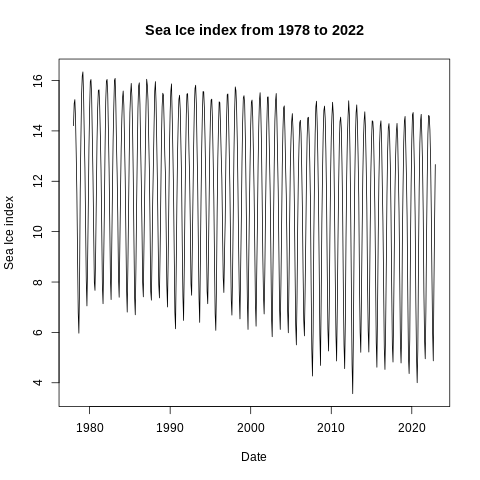

In [ ]:
%%R
#Valores por mes, cada linea es un mes distinto. 
plot.ts(Df_ts, plot.type = c("single"),xlab="Date", ylab = "Sea Ice index",main="Sea Ice index from 1978 to 2022",col = rep(1:13))


Si comparamos la grafica según la clasificación de pegel podemos ver que los datos disminuyen a medida que pasan los años, se puede ver que la estocionalidad es aditiva o ligeramente multiplicativa, ya que los picos varián muy poco a lor largo de los años. 


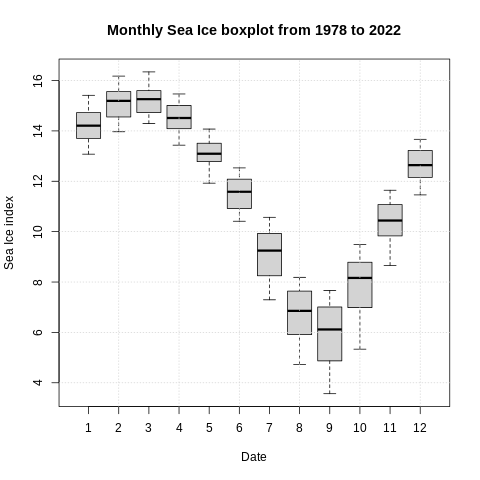

In [ ]:
%%R
boxplot(Df_ts~cycle(Df_ts),xlab="Date", ylab = "Sea Ice index" ,main ="Monthly Sea Ice boxplot from 1978 to 2022")
grid()

Podemos observar que el hielo alcanza su pico minimo en septiembre, donde la media de valores es más baja. Hay una relación con las estaciones, en invierno el hielo es mayor que el hielo en verano. 



  method            from
  as.zoo.data.frame zoo 

  Crossvalidated is a great place to get help on forecasting issues:
  http://stats.stackexchange.com/tags/forecasting.



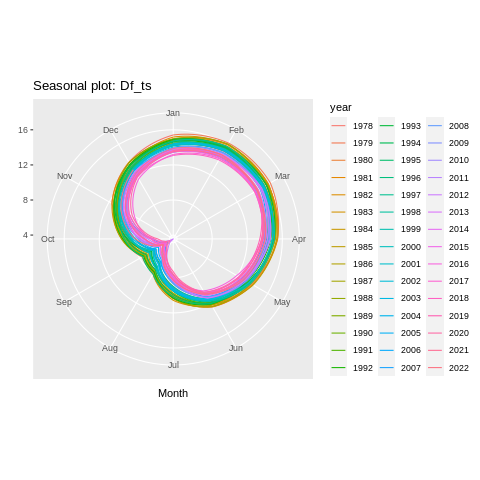

In [ ]:
%%R
#+ ylab("Date") + ggtitle("Polar seasonal plot: Monthly Sea Ice") 
if (!require("forecast", lib.loc = lib_loc)) install.packages("forecast", lib = lib_loc)
library(forecast, lib.loc = lib_loc)

ggseasonplot(Df_ts, polar=TRUE) 

In [ ]:
#Hacer pequeña conclusión aqui.

# Descomposición de la serie temporal

In [ ]:
%%R
SI <- Df_ts

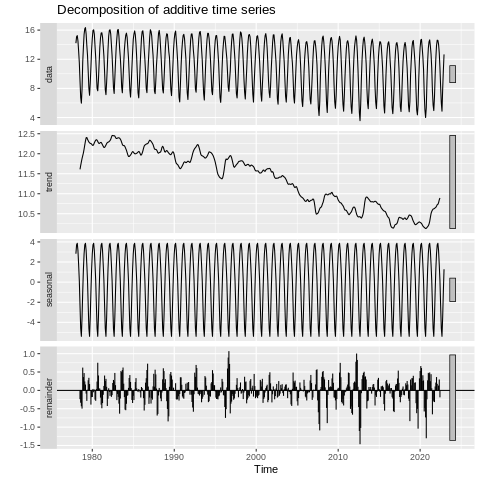

In [ ]:
%%R
if (!require("zoo", lib.loc = lib_loc)) install.packages("zoo", lib = lib_loc)
library(zoo, lib.loc = lib_loc)

decomposeSI_additive <- decompose(SI,"additive")
autoplot(decomposeSI_additive)

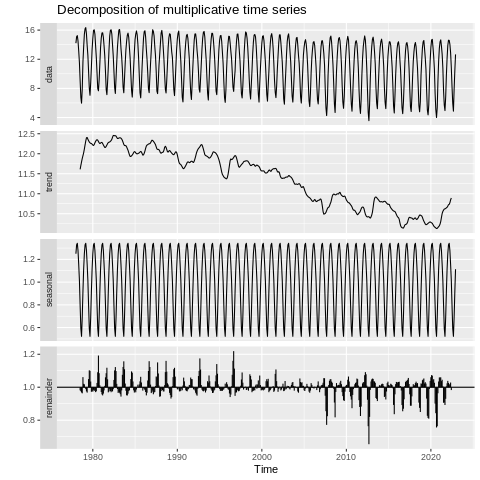

In [ ]:
%%R
if (!require("zoo", lib.loc = lib_loc)) install.packages("zoo", lib = lib_loc)
library(zoo, lib.loc = lib_loc)
 
  decomposeSI_multi <- decompose(SI,"multiplicative")
  autoplot(decomposeSI_multi)


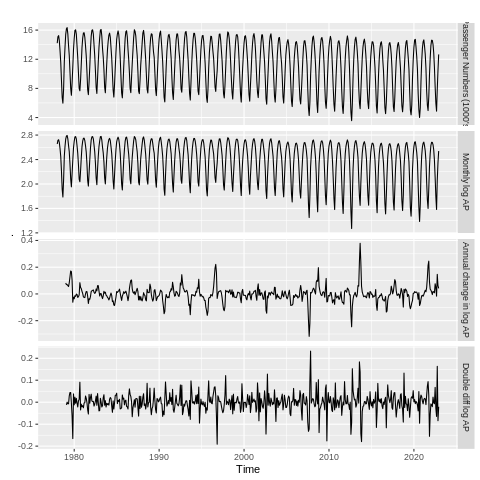

In [ ]:
%%R
cbind("Passenger Numbers (1000's)" = SI,
      "Monthly log AP" = log(SI),
      "Annual change in log AP" = diff(log(SI),12),
      "Double diff log AP"= diff(diff(log(SI),12))) %>%
     autoplot(facets=TRUE)

In [ ]:
#Otra conclusión, basicamente confirmando que es aditivo.  por ejemplo comparando los residuos


# Comprobación de los requisitos para el modelado

Para poder aplicar los modelos de “Box-Jenkins” ha de cumplirse que la serie sea estacionaria, esto quiere decir que la media, la varianza y la covarianza no cambien con el tiempo. Además no debe haber autocorrelación entre los residuos.

Augmented Dickey-Fuller Test (ADF): Este test establece un hipótesis nula H0 en el que la serie no es estacionaria, y como hipótesis alternativa H1 que la serie temporal es estacionaria.

In [ ]:
%%R
if (!require("tseries", lib.loc = lib_loc)) install.packages("tseries", lib = lib_loc)
library(tseries, lib.loc = lib_loc)


adf.test(SI)



    ‘tseries’ version: 0.10-52

    ‘tseries’ is a package for time series analysis and computational
    finance.

    See ‘library(help="tseries")’ for details.





	Augmented Dickey-Fuller Test

data:  SI
Dickey-Fuller = -12.906, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary



In [ ]:
#Seg?n los resultados de la prueba anterior, el valor p es de 0,01, que es <0,05,
#por lo que rechazamos la hip?tesis nula a favor de la hip?tesis alternativa de que la serie temporal es estacionaria.
#Podemos comprobar que es estacionaría ya que se descarta la hipotesis nula

Test de autocorrelación: conocido por las siglas ACF del ingles “Autocorrelation and Cross-correlation Function estimation”. Esta función traza la correlación entre una serie y sus retrasos, es decir, observaciones anteriores con un intervalo de confianza del 95 % en azul. Si la autocorrelación cruza las líneas azules discontinuas, significa que el retraso específico está significativamente correlacionado con la serie actual.

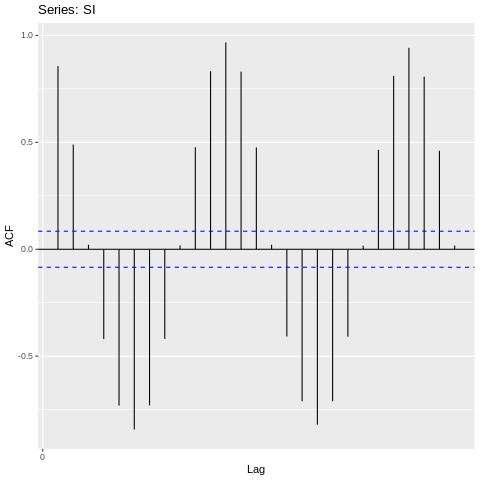

In [ ]:
%%R
if (!require("tseries", lib.loc = lib_loc)) install.packages("tseries", lib = lib_loc)
library(tseries, lib.loc = lib_loc)


autoplot(acf(SI,plot=FALSE))

In [ ]:
%%R
decomposeSI_additive$random

               Jan           Feb           Mar           Apr           May
1978            NA            NA            NA            NA            NA
1979  0.4714053556  0.2447132995  0.1596512945 -0.0880595264 -0.2856159051
1980 -0.1811165788  0.0395199635 -0.0519369279  0.0204579154 -0.2530325718
1981 -0.1976165788 -0.3884383698 -0.4867285945 -0.3448754179 -0.1213659051
1982  0.0565917545 -0.0462300365 -0.1495202612 -0.0297087512 -0.1763659051
1983 -0.2662832455 -0.0962300365 -0.1772285945 -0.3622920846 -0.6337825718
1984 -0.5233665788 -0.5388967032 -0.3661869279 -0.1502087512 -0.1312409051
1985 -0.1468665788 -0.2643133698  0.0213547388  0.2256245821  0.3335924282
1986  0.0922584212  0.0629366302 -0.0199785945 -0.2115837512 -0.5495325718
1987 -0.1943665788  0.0089366302 -0.3591035945 -0.2122920846 -0.2536575718
1988 -0.6420458424 -0.1394635636  0.0656212117 -0.0475256117 -0.2185994323
1989  0.0616334212 -0.2948550365 -0.5055619279 -0.8445837512 -0.7078659051
1990 -0.0138665788 -0.020

In [ ]:
#los valores nulos se encuentran al principio de la serie y al final, precisamente las celdas con valores empiezan en la celda 7 y terminan en la celda 522
#Como aparecen términos que faltan no los contabilizamos. 
#Estos términos aparecen como NA y se observen entre los meses de Jan-Jun de 1978 y Jul-Dec de 2022

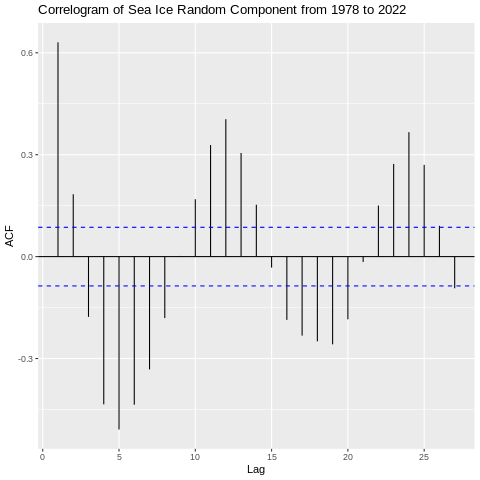

In [ ]:
%%R
if (!require("tseries", lib.loc = lib_loc)) install.packages("tseries", lib = lib_loc)
library(tseries, lib.loc = lib_loc)

autoplot(acf(decomposeSI_additive$random[7:522],plot=FALSE)) + labs(title="Correlogram of Sea Ice Random Component from 1978 to 2022") 

El retraso específico está significativamente correlacionado con la serie actual, ya que en esta ulima representación se observa que los residuos se encuentran centrados alrededor de cero.

# Modelo y entrenamiento de la serie temporal

`geom_smooth()` using formula = 'y ~ x'


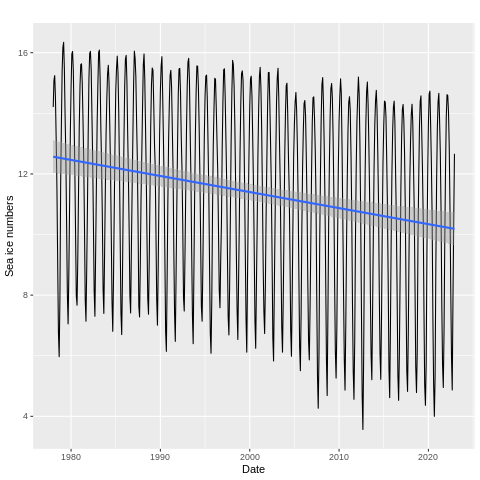

In [ ]:
%%R
if (!require("ggplot2", lib.loc = lib_loc)) install.packages("ggplot2", lib = lib_loc)
library(ggplot2, lib.loc = lib_loc)

autoplot(SI) + geom_smooth(method="lm") + labs(x ="Date", y = "Sea ice numbers")

Ahora evaluaremos solo sobre la tendencía. 

`geom_smooth()` using formula = 'y ~ x'


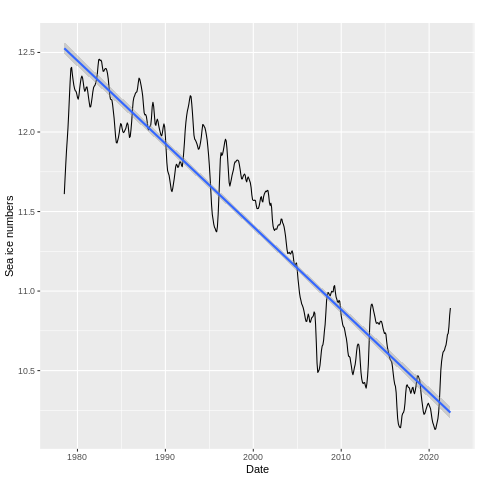

In [ ]:
%%R
if (!require("ggplot2", lib.loc = lib_loc)) install.packages("ggplot2", lib = lib_loc)
library(ggplot2, lib.loc = lib_loc)

autoplot(decomposeSI_additive$trend) + geom_smooth(method="lm") + labs(x ="Date", y = "Sea ice numbers")

El modelo lineal del filtrado se aproxima levemente a la tendencia de la serie.Le falta añadair información estacional.

#Modelo ARIMA

In [ ]:
%%R

arimaSI <- auto.arima(SI,seasonal=TRUE)
arimaSI

Series: SI 
ARIMA(1,0,1)(1,1,1)[12] with drift 

Coefficients:
         ar1     ma1    sar1     sma1    drift
      0.6885  0.1822  0.0598  -0.8263  -0.0034
s.e.  0.0422  0.0571  0.0583   0.0334   0.0007

sigma^2 = 0.06747:  log likelihood = -41.67
AIC=95.35   AICc=95.51   BIC=120.96


In [ ]:

#el modelo estacional un término autorregresivo de primer retardo (D)   
#el periodo del modelo es de12 (m) unidades, es decir, meses.


  method                 from    
  autoplot.Arima         forecast
  autoplot.acf           forecast
  autoplot.ar            forecast
  autoplot.bats          forecast
  autoplot.decomposed.ts forecast
  autoplot.ets           forecast
  autoplot.forecast      forecast
  autoplot.stl           forecast
  autoplot.ts            forecast
  fitted.ar              forecast
  fortify.ts             forecast
  residuals.ar           forecast



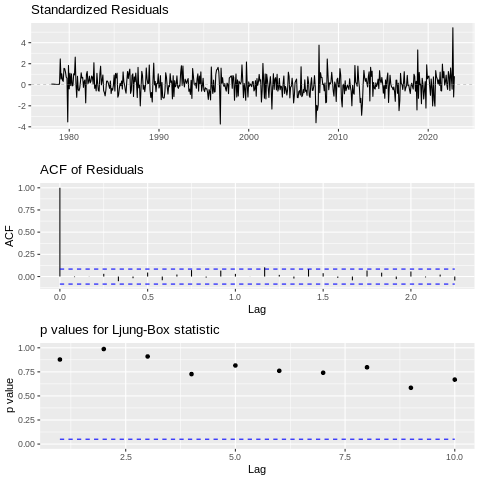

In [ ]:
%%R
if (!require("ggfortify", lib.loc = lib_loc)) install.packages("ggfortify", lib = lib_loc)
library(ggfortify, lib.loc = lib_loc)

ggtsdiag(arimaSI)




	Ljung-Box test

data:  Residuals from ARIMA(1,0,1)(1,1,1)[12] with drift
Q* = 29.04, df = 20, p-value = 0.08697

Model df: 4.   Total lags used: 24



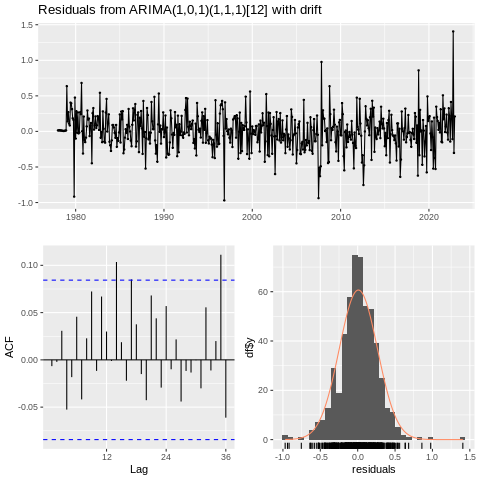

In [ ]:
%%R
checkresiduals(arimaSI)

In [ ]:
%%R
mean(arimaSI$residuals)

[1] 0.008980537


Podemos observar que el valor medio de los residuos es muy cercano a cero

# Evaluación cuantitativa

En primer lugar, dividimos la serie entre “entrenamiento” y “test”. 
En nuestro caso escogemos que los datos de entrenamiento correspondan al conjunto de la serie menos seis ciclos (6 años, 72 meses).

In [ ]:
%%R
length(SI)-72

[1] 468


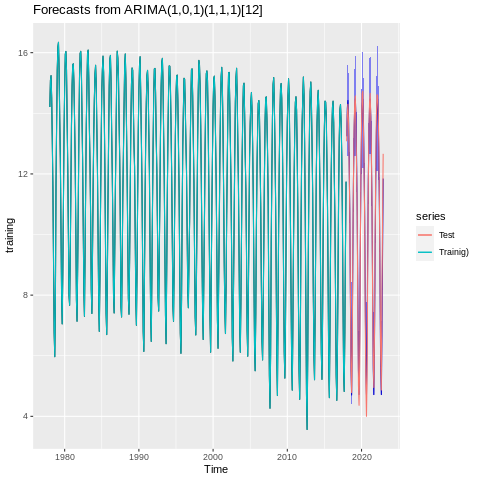

In [ ]:
%%R


training <- subset(SI, end=length(SI)-72)
test <- subset(SI, start=length(SI)-71)

SI_train<- Arima(training,
                 order=c(1,0,1),
                 seasonal=c(1,1,1),
                 lambda=0)

#AP_train <- auto.arima(training,seasonal=TRUE)

SI_train %>%
  forecast(level = c(95),h=72) %>%
  autoplot(series="forcast")+
  autolayer(test, series = "Test")+
  autolayer(training,series = "Trainig)")


In [ ]:
%%R

SI_test <- Arima(test, model=SI_train)
accuracy(SI_test)

                     ME      RMSE      MAE       MPE     MAPE      MASE
Training set 0.02842154 0.4109276 0.245996 0.1749743 2.755223 0.7644358
                   ACF1
Training set -0.5497927


Comprobamos que pasa con los datos de entrenamiento.

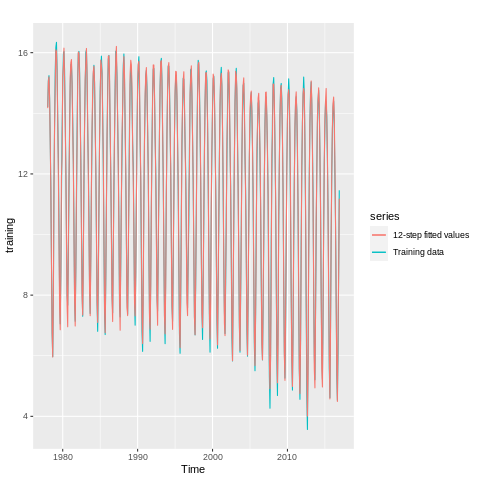

In [ ]:
%%R
autoplot(training, series="Training data") +
  autolayer(fitted(SI_train),
            series="12-step fitted values")

In [ ]:
%%R
SI_test <- Arima(training, model=SI_train)
accuracy(SI_test)

                      ME      RMSE       MAE        MPE    MAPE      MASE
Training set -0.02426367 0.2713574 0.2050603 -0.3441623 2.09336 0.5688931
                   ACF1
Training set -0.1093358


HACER CONCLUSIONES

# Predicción con el modelo ARIMA
El objetivo es realizar una previsión con una confianza del 95%.

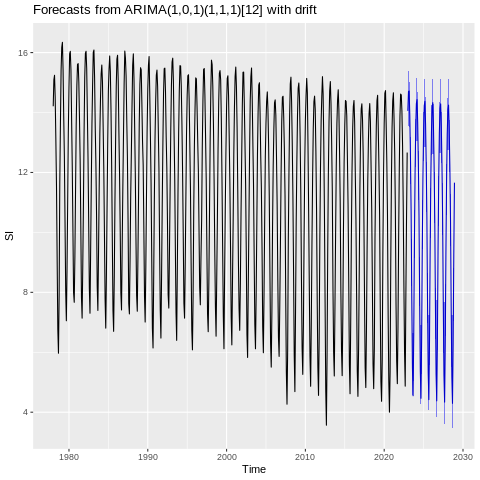

In [ ]:
%%R
forecastSI <- forecast(arimaSI, level = c(95), h = 72)
# c= al intervalo de confianza, h el horizonte de previsión 

autoplot(forecastSI)

Aqui tenemos nuestra predicción para los proximos 6 años. 